In [1]:
# number of latest gameweek
gameweek = 1

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import pickle
import json
import requests

import shap
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from scipy.stats import poisson
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import plotly.graph_objects as go

# allow more data columns/rows to be shown than by default
pd.set_option('display.max_columns', 501)
pd.set_option('display.max_rows', 501)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [3]:
fpl_df = pd.read_csv(f'../data/fpl_data/fpl_week_{gameweek}.csv')
fpl_fixtures = pd.read_csv('../data/fpl_fixtures.csv', index_col=0)
display(fpl_df)
display(fpl_fixtures)

,id,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,season,name,position,GW,value,selected,transfers_balance,opp_team_name,kickoff_time,was_home
0,1,NaN,NaN,58822,0,0,0,0,0,2,2.4,2.4,0,Cédric,0.0,False,NaN,NaN,45,58822.jpg,0.0,Alves Soares,0.3,False,NaN,a,Arsenal,3,0,1180,1180,6007,6007,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,345,148,341,145,279,113,361,148,4.0,NaN,3.0,NaN,NaN,NaN,2022-23,Cedric Alves Soares,DEF,1,4.5,25964.127,-4827,Crystal Palace,2022-08-05T19:00:00Z,0
1,3,NaN,NaN,84450,0,0,0,0,0,3,2.1,2.1,2,Granit,2.0,False,NaN,NaN,50,84450.jpg,2.0,Xhaka,0.7,False,NaN,a,Arsenal,3,2,8050,8050,8788,8788,0.4,0.4,Xhaka,90,0,0,1,0,0,0,0,1,0,0,0,12,16.6,15.0,2.0,3.4,98,32,81,52,167,90,123,65,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,Granit Xhaka,MID,1,5.0,60582.963,-738,Crystal Palace,2022-08-05T19:00:00Z,0
2,4,NaN,NaN,153256,0,0,0,0,0,3,1.5,1.5,0,Mohamed,0.0,False,NaN,NaN,45,153256.jpg,0.0,Elneny,1.0,False,NaN,a,Arsenal,3,0,5353,5353,17006,17006,0.0,0.0,Elneny,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,380,130,377,140,321,115,396,139,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,Mohamed Elneny,MID,1,4.5,86547.090,-11653,Crystal Palace,2022-08-05T19:00:00Z,0
3,5,NaN,NaN,156074,0,0,0,0,0,2,2.4,2.4,0,Rob,0.0,False,NaN,NaN,45,156074.jpg,0.0,Holding,0.2,False,NaN,a,Arsenal,3,0,523,523,3328,3328,0.0,0.0,Holding,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,383,168,382,165,326,138,399,168,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,Rob Holding,DEF,1,4.5,17309.418,-2805,Crystal Palace,2022-08-05T19:00:00Z,0
4,6,NaN,NaN,167199,0,0,0,0,0,3,2.1,2.1,3,Thomas,3.0,False,NaN,NaN,50,167199.jpg,3.0,Partey,0.7,False,NaN,a,Arsenal,3,3,11320,11320,7903,7903,0.6,0.6,Partey,90,0,0,1,0,0,0,0,0,0,0,0,17,22.6,12.9,10.0,4.6,61,23,95,58,96,57,85,48,NaN,NaN,4.0,NaN,NaN,NaN,2022-23,Thomas Partey,MID,1,5.0,60582.963,3417,Crystal Palace,2022-08-05T19:00:00Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,558,NaN,NaN,490721,0,0,0,0,0,2,1.5,1.5,0,Hugo,0.0,False,NaN,NaN,40,490721.jpg,0.0,Bueno López,0.7,False,NaN,a,Wolves,39,0,6739,6739,3870,3870,0.0,0.0,Bueno,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,328,134,323,131,257,96,344,134,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,Hugo Bueno Lopez,DEF,1,4.0,60582.963,2869,Leeds United,2022-08-06T14:00:00Z,0
576,566,NaN,NaN,240299,0,0,0,0,0,3,1.5,1.5,0,Joseph,0.0,False,NaN,NaN,45,240299.jpg,0.0,Hodge,0.0,False,NaN,a,Wolves,39,0,701,701,169,169,0.0,0.0,Hodge,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,422,150,427,160,387,136,438,159,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,Joseph Hodge,MID,1,4.5,0.000,532,Leeds United,2022-08-06T14:00:00Z,0
577,567,NaN,NaN,198842,0,0,0,0,0,3,1.5,1.5,0,Connor,0.0,False,NaN,NaN,45,198842.jpg,0.0,Ronan,0.0,False,NaN,a,Wolves,39,0,1588,1588,394,394,0.0,0.0,Ronan,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,396,138,396,148,347,124,412,147,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,Connor Ronan,MID,1,4.5,0.000,1194,Leeds Uni

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id,home_team,away_team
0,2292810,1,True,True,1,2022-08-05T19:00:00Z,90,False,True,1,2.0,7,0.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,2,74911,Crystal Palace,Arsenal
1,2292813,1,True,True,4,2022-08-06T11:30:00Z,90,False,True,12,2.0,9,2.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",5,2,74914,Fulham,Liverpool
2,2292811,1,True,True,2,2022-08-06T14:00:00Z,90,False,True,2,0.0,3,2.0,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,2,74912,Bournemouth,Aston Villa
3,2292814,1,True,True,5,2022-08-06T14:00:00Z,90,False,True,20,1.0,11,2.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,74915,Leeds United,Wolves
4,2292816,1,True,True,7,2022-08-06T14:00:00Z,90,False,True,16,0.0,15,2.0,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,3,74917,Newcastle Utd,Nottingham Forest
5,2292817,1,True,True,8,2022-08-06T14:00:00Z,90,False,True,17,1.0,18,4.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,74918,Tottenham,Southampton
6,2292812,1,True,True,3,2022-08-06T16:30:00Z,90,False,True,6,1.0,8,0.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,2,74913,Everton,Chelsea
7,2292815,1,True,True,6,2022-08-07T13:00:00Z,90,False,True,4,2.0,10,2.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,74916,Leicester City,Brentford
8,2292818,1,True,True,9,2022-08-07T13:00:00Z,90,False,True,5,2.0,14,1.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,74919,Manchester Utd,Brighton
9,2292819,1,True,True,10,2022-08-07T15:30:00Z,90,False,True,13,2.0,19,0.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",5,3,74920,West Ham,Manchester City


In [4]:
team_stats = pd.read_csv('../data/team_stats.csv', index_col=0, usecols=['date','team','team_xG', 'team_xGA'])
team_stats

,team,team_xG,team_xGA
date,,,
2017-08-11 00:00:00+00:00,Arsenal,2.3,1.3
2017-08-11 00:00:00+00:00,Leicester City,1.3,2.3
2017-08-12 00:00:00+00:00,Watford,2.1,3.1
2017-08-12 00:00:00+00:00,Liverpool,3.1,2.1
2017-08-12 00:00:00+00:00,Crystal Palace,1.1,1.7
...,...,...,...
2022-08-07 00:00:00+00:00,Brentford,0.5,0.6
2022-08-07 00:00:00+00:00,Manchester Utd,1.7,1.6
2022-08-07 00:00:00+00:00,Brighton,1.6,1.7


In [5]:
xgb_models = []
for i in range(1,11):
    xgb = XGBRegressor()
    xgb.load_model(f'../models/xgb_regression_full_game{i}.json')
    xgb_models.append(xgb)
display(xgb_models[0])
display(xgb_models[9])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8254703688775018,
             enable_categorical=False, gamma=0.25226144515542404, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.06285391203893921, max_delta_step=0, max_depth=3,
             min_child_weight=1.8725484088145359, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7993913128492731, tree_method='auto',
             validate_parameters=1, verbosity=None)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5195376619139985,
             enable_categorical=False, gamma=0.35139253750058574, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.03261313301598562, max_delta_step=0, max_depth=3,
             min_child_weight=0.9469696895323456, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.804844605129602, tree_method='auto',
             validate_parameters=1, verbosity=None)

In [6]:
player_data = pd.read_csv('../data/data_for_projections.csv', index_col=0)
player_data

,penalties_missed,influence,season,saves,transfers_in,name,threat,was_home,transfers_out,minutes,clean_sheets,goals_scored,own_goals,value,bps,assists,GW,penalties_saved,yellow_cards,ict_index,kickoff_time,opp_team_name,red_cards,goals_conceded,position,creativity,transfers_balance,bonus,selected,total_points,General_#,General_Nation,General_Pos,General_Age,General_Min,Performance_Gls,Performance_Ast,Performance_PK,Performance_PKatt,Performance_Sh,Performance_SoT,Performance_CrdY,Performance_CrdR,Performance_Touches,Performance_Press,Performance_Tkl,Performance_Int,Performance_Blocks,Expected_xG,Expected_npxG,Expected_xA,SCA_SCA,SCA_GCA,Passes_Cmp,Passes_Att,Passes_Cmp%,Passes_Prog,Carries_Carries,Carries_Prog,Dribbles_Succ,Dribbles_Att,team,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,General_Ast,General_xA,General_KP,General_1/3,General_PPA,General_CrsPA,General_Prog,General_Att,Pass Types_Live,Pass Types_Dead,Pass Types_FK,Pass Types_TB,Pass Types_Press,Pass Types_Sw,Pass Types_Crs,Pass Types_CK,Corner Kicks_In,Corner Kicks_Out,Corner Kicks_Str,Height_Ground,Height_Low,Height_High,Body Parts_Left,Body Parts_Right,Body Parts_Head,Body Parts_TI,Body Parts_Other,Outcomes_Cmp,Outcomes_Off,Outcomes_Out,Outcomes_Int,Outcomes_Blocks,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Vs Dribbles_Tkl,Vs Dribbles_Att,Vs Dribbles_Tkl%,Vs Dribbles_Past,Pressures_Press,Pressures_Succ,Pressures_%,Pressures_Def 3rd,Pressures_Mid 3rd,Pressures_Att 3rd,Blocks_Blocks,Blocks_Sh,Blocks_ShSv,Blocks_Pass,General_Int,General_Tkl+Int,General_Clr,General_Err,Touches_Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Dribbles_Succ%,Dribbles_#Pl,Dribbles_Megs,Carries_TotDist,Carries_PrgDist,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Targ,Receiving_Rec,Receiving_Rec%,Receiving_Prog,Performance_2CrdY,Performance_Fls,Performance_Fld,Performance_Off,Performance_Crs,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,fpl_position_GK,fpl_position_DEF,fpl_position_MID,fpl_position_FWD,fbref_position_GK,fbref_position_LB,fbref_position_CB,fbref_position_RB,fbref_position_WB,fbref_position_DM,fbref_position_LM,fbref_position_CM,fbref_position_RM,fbref_position_AM,fbref_position_LW,fbref_position_RW,fbref_position_FW,team_xG,team_xGA,team_xG_ewa_5_shifted_0,team_xG_ewa_10_shifted_0,team_xG_ewa_20_shifted_0,team_xG_ewa_40_shifted_0,team_xGA_ewa_5_shifted_0,team_xGA_ewa_10_shifted_0,team_xGA_ewa_20_shifted_0,team_xGA_ewa_40_shifted_0,opp_team_xG,opp_team_xGA,opp_team_xG_ewa_5_shifted_0,opp_team_xG_ewa_10_shifted_0,opp_team_xG_ewa_20_shifted_0,opp_team_xG_ewa_40_shifted_0,opp_team_xGA_ewa_5_shifted_0,opp_team_xGA_ewa_10_shifted_0,opp_team_xGA_ewa_20_shifted_0,opp_team_xGA_ewa_40_shifted_0,xPoints,games_in_past_5_days_shifted_0,games_in_past_10_days_shifted_0,games_in_past_20_days_shifted_0,games_in_past_40_days_shifted_0,selected_shifted_0,transfers_balance_shifted_0,value_shifted_0,transfers_balance_%_shifted_0,transfers_balance_%_ewa5_shifted_0,transfers_balance_%_ewa10_shifted_0,value_change_1_shifted_0,value_change_2_shifted_0,value_change_5_shifted_0,goal_to_xg_ratio_ewa_40_shifted0,total_points_ewa_5_shifted_0,xPoints_ewa_5_shifted_0,assists_ewa_5_shifted_0,bonus_ewa_5_shifted_0,bps_ewa_5_shifted_0,clean_sheets_ewa_5_shifted_0,creativity_ewa_5_shifted_0,goals_conceded_ewa_5_shifted_0,goals_scored_ewa_5_shifted_0,ict_index_ewa_5_shifted_0,influence_ewa_5_shifted_0,minutes_ewa_5_shifted_0,own_goals_ewa_5_shifted_0,penalties_missed_ewa_5_shifted_0,penalties_saved_ewa_5_shifted_0,saves_ewa_5_shifted_0,threat_ewa_5_shifted_0,yellow_cards_ewa_5_shifted_0,Performance_Sh_ewa_5_shifted_0,Performance_SoT_ewa_5_shifted_0,Performance_Touches_ewa_5_shifted_0,Performance_Press_ewa_5_shifted_0,Pe

In [7]:
np.array(player_data.columns)

array(['penalties_missed', 'influence', 'season', 'saves', 'transfers_in',
       'name', 'threat', 'was_home', 'transfers_out', 'minutes',
       'clean_sheets', 'goals_scored', 'own_goals', 'value', 'bps',
       'assists', 'GW', 'penalties_saved', 'yellow_cards', 'ict_index',
       'kickoff_time', 'opp_team_name', 'red_cards', 'goals_conceded',
       'position', 'creativity', 'transfers_balance', 'bonus', 'selected',
       'total_points', 'General_#', 'General_Nation', 'General_Pos',
       'General_Age', 'General_Min', 'Performance_Gls', 'Performance_Ast',
       'Performance_PK', 'Performance_PKatt', 'Performance_Sh',
       'Performance_SoT', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_Touches', 'Performance_Press', 'Performance_Tkl',
       'Performance_Int', 'Performance_Blocks', 'Expected_xG',
       'Expected_npxG', 'Expected_xA', 'SCA_SCA', 'SCA_GCA', 'Passes_Cmp',
       'Passes_Att', 'Passes_Cmp%', 'Passes_Prog', 'Carries_Carries',
       'Carries_Prog',

In [8]:
keep = [
        'was_home', 'fpl_position_GK', 'fpl_position_DEF',
       'fpl_position_MID', 'fpl_position_FWD', 'team_xG_ewa_5_shifted_0',
       'team_xG_ewa_10_shifted_0', 'team_xG_ewa_20_shifted_0',
       'team_xG_ewa_40_shifted_0', 'team_xGA_ewa_5_shifted_0',
       'team_xGA_ewa_10_shifted_0', 'team_xGA_ewa_20_shifted_0',
       'team_xGA_ewa_40_shifted_0', 'opp_team_xG_ewa_5_shifted_0',
       'opp_team_xG_ewa_10_shifted_0', 'opp_team_xG_ewa_20_shifted_0',
       'opp_team_xG_ewa_40_shifted_0', 'opp_team_xGA_ewa_5_shifted_0',
       'opp_team_xGA_ewa_10_shifted_0', 'opp_team_xGA_ewa_20_shifted_0',
       'opp_team_xGA_ewa_40_shifted_0', 'games_in_past_5_days_shifted_0',
       'games_in_past_10_days_shifted_0',
       'games_in_past_20_days_shifted_0',
       'games_in_past_40_days_shifted_0',
       'transfers_balance_%_shifted_0',
       'transfers_balance_%_ewa5_shifted_0',
       'transfers_balance_%_ewa10_shifted_0',
       'value_change_1_shifted_0', 'value_change_2_shifted_0',
       'value_change_5_shifted_0', 'goal_to_xg_ratio_ewa_40_shifted0',
       'total_points_ewa_5_shifted_0', 'xPoints_ewa_5_shifted_0',
       'assists_ewa_5_shifted_0', 'bonus_ewa_5_shifted_0',
       'bps_ewa_5_shifted_0', 'clean_sheets_ewa_5_shifted_0',
       'creativity_ewa_5_shifted_0', 'goals_conceded_ewa_5_shifted_0',
       'goals_scored_ewa_5_shifted_0', 'ict_index_ewa_5_shifted_0',
       'influence_ewa_5_shifted_0', 'minutes_ewa_5_shifted_0',
       'own_goals_ewa_5_shifted_0', 'penalties_missed_ewa_5_shifted_0',
       'penalties_saved_ewa_5_shifted_0', 'saves_ewa_5_shifted_0',
       'threat_ewa_5_shifted_0', 'yellow_cards_ewa_5_shifted_0',
       'Performance_Sh_ewa_5_shifted_0',
       'Performance_SoT_ewa_5_shifted_0',
       'Performance_Touches_ewa_5_shifted_0',
       'Performance_Press_ewa_5_shifted_0',
       'Performance_Tkl_ewa_5_shifted_0',
       'Performance_Int_ewa_5_shifted_0',
       'Performance_Blocks_ewa_5_shifted_0',
       'Expected_xG_ewa_5_shifted_0', 'Expected_npxG_ewa_5_shifted_0',
       'Expected_xA_ewa_5_shifted_0', 'SCA_SCA_ewa_5_shifted_0',
       'Passes_Cmp_ewa_5_shifted_0', 'Passes_Cmp%_ewa_5_shifted_0',
       'Passes_Prog_ewa_5_shifted_0', 'Carries_Carries_ewa_5_shifted_0',
       'Carries_Prog_ewa_5_shifted_0', 'Dribbles_Succ_ewa_5_shifted_0',
       'Dribbles_Att_ewa_5_shifted_0', 'General_KP_ewa_5_shifted_0',
       'Touches_Att 3rd_ewa_5_shifted_0',
       'Touches_Att Pen_ewa_5_shifted_0',
       'Performance_Recov_ewa_5_shifted_0',
       'Aerial Duels_Won_ewa_5_shifted_0',
       'Aerial Duels_Won%_ewa_5_shifted_0',
       'fbref_position_GK_ewa5_shifted_0',
       'fbref_position_LB_ewa5_shifted_0',
       'fbref_position_CB_ewa5_shifted_0',
       'fbref_position_RB_ewa5_shifted_0',
       'fbref_position_WB_ewa5_shifted_0',
       'fbref_position_DM_ewa5_shifted_0',
       'fbref_position_LM_ewa5_shifted_0',
       'fbref_position_CM_ewa5_shifted_0',
       'fbref_position_RM_ewa5_shifted_0',
       'fbref_position_AM_ewa5_shifted_0',
       'fbref_position_LW_ewa5_shifted_0',
       'fbref_position_RW_ewa5_shifted_0',
       'fbref_position_FW_ewa5_shifted_0',
       'total_points_ewa_10_shifted_0', 'xPoints_ewa_10_shifted_0',
       'assists_ewa_10_shifted_0', 'bonus_ewa_10_shifted_0',
       'bps_ewa_10_shifted_0', 'clean_sheets_ewa_10_shifted_0',
       'creativity_ewa_10_shifted_0', 'goals_conceded_ewa_10_shifted_0',
       'goals_scored_ewa_10_shifted_0', 'ict_index_ewa_10_shifted_0',
       'influence_ewa_10_shifted_0', 'minutes_ewa_10_shifted_0',
       'own_goals_ewa_10_shifted_0',
       'penalties_missed_ewa_10_shifted_0',
       'penalties_saved_ewa_10_shifted_0', 'saves_ewa_10_shifted_0',
       'threat_ewa_10_shifted_0', 'yellow_cards_ewa_10_shifted_0',
       'Performance_Sh_ewa_10_shifted_0',
       'Performance_SoT_ewa_10_shifted_0',
       'Performance_Touches_ewa_10_shifted_0',
       'Performance_Press_ewa_10_shifted_0',
       'Performance_Tkl_ewa_10_shifted_0',
       'Performance_Int_ewa_10_shifted_0',
       'Performance_Blocks_ewa_10_shifted_0',
       'Expected_xG_ewa_10_shifted_0', 'Expected_npxG_ewa_10_shifted_0',
       'Expected_xA_ewa_10_shifted_0', 'SCA_SCA_ewa_10_shifted_0',
       'Passes_Cmp_ewa_10_shifted_0', 'Passes_Cmp%_ewa_10_shifted_0',
       'Passes_Prog_ewa_10_shifted_0',
       'Carries_Carries_ewa_10_shifted_0',
       'Carries_Prog_ewa_10_shifted_0',
       'Dribbles_Succ_ewa_10_shifted_0',
       'Dribbles_Att_ewa_10_shifted_0', 'General_KP_ewa_10_shifted_0',
       'Touches_Att 3rd_ewa_10_shifted_0',
       'Touches_Att Pen_ewa_10_shifted_0',
       'Performance_Recov_ewa_10_shifted_0',
       'Aerial Duels_Won_ewa_10_shifted_0',
       'Aerial Duels_Won%_ewa_10_shifted_0',
       'fbref_position_GK_ewa10_shifted_0',
       'fbref_position_LB_ewa10_shifted_0',
       'fbref_position_CB_ewa10_shifted_0',
       'fbref_position_RB_ewa10_shifted_0',
       'fbref_position_WB_ewa10_shifted_0',
       'fbref_position_DM_ewa10_shifted_0',
       'fbref_position_LM_ewa10_shifted_0',
       'fbref_position_CM_ewa10_shifted_0',
       'fbref_position_RM_ewa10_shifted_0',
       'fbref_position_AM_ewa10_shifted_0',
       'fbref_position_LW_ewa10_shifted_0',
       'fbref_position_RW_ewa10_shifted_0',
       'fbref_position_FW_ewa10_shifted_0',
       'total_points_ewa_20_shifted_0', 'xPoints_ewa_20_shifted_0',
       'assists_ewa_20_shifted_0', 'bonus_ewa_20_shifted_0',
       'bps_ewa_20_shifted_0', 'clean_sheets_ewa_20_shifted_0',
       'creativity_ewa_20_shifted_0', 'goals_conceded_ewa_20_shifted_0',
       'goals_scored_ewa_20_shifted_0', 'ict_index_ewa_20_shifted_0',
       'influence_ewa_20_shifted_0', 'minutes_ewa_20_shifted_0',
       'own_goals_ewa_20_shifted_0',
       'penalties_missed_ewa_20_shifted_0',
       'penalties_saved_ewa_20_shifted_0', 'saves_ewa_20_shifted_0',
       'threat_ewa_20_shifted_0', 'yellow_cards_ewa_20_shifted_0',
       'Performance_Sh_ewa_20_shifted_0',
       'Performance_SoT_ewa_20_shifted_0',
       'Performance_Touches_ewa_20_shifted_0',
       'Performance_Press_ewa_20_shifted_0',
       'Performance_Tkl_ewa_20_shifted_0',
       'Performance_Int_ewa_20_shifted_0',
       'Performance_Blocks_ewa_20_shifted_0',
       'Expected_xG_ewa_20_shifted_0', 'Expected_npxG_ewa_20_shifted_0',
       'Expected_xA_ewa_20_shifted_0', 'SCA_SCA_ewa_20_shifted_0',
       'Passes_Cmp_ewa_20_shifted_0', 'Passes_Cmp%_ewa_20_shifted_0',
       'Passes_Prog_ewa_20_shifted_0',
       'Carries_Carries_ewa_20_shifted_0',
       'Carries_Prog_ewa_20_shifted_0',
       'Dribbles_Succ_ewa_20_shifted_0',
       'Dribbles_Att_ewa_20_shifted_0', 'General_KP_ewa_20_shifted_0',
       'Touches_Att 3rd_ewa_20_shifted_0',
       'Touches_Att Pen_ewa_20_shifted_0',
       'Performance_Recov_ewa_20_shifted_0',
       'Aerial Duels_Won_ewa_20_shifted_0',
       'Aerial Duels_Won%_ewa_20_shifted_0',
       'fbref_position_GK_ewa20_shifted_0',
       'fbref_position_LB_ewa20_shifted_0',
       'fbref_position_CB_ewa20_shifted_0',
       'fbref_position_RB_ewa20_shifted_0',
       'fbref_position_WB_ewa20_shifted_0',
       'fbref_position_DM_ewa20_shifted_0',
       'fbref_position_LM_ewa20_shifted_0',
       'fbref_position_CM_ewa20_shifted_0',
       'fbref_position_RM_ewa20_shifted_0',
       'fbref_position_AM_ewa20_shifted_0',
       'fbref_position_LW_ewa20_shifted_0',
       'fbref_position_RW_ewa20_shifted_0',
       'fbref_position_FW_ewa20_shifted_0',
       'total_points_ewa_40_shifted_0', 'xPoints_ewa_40_shifted_0',
       'assists_ewa_40_shifted_0', 'bonus_ewa_40_shifted_0',
       'bps_ewa_40_shifted_0', 'clean_sheets_ewa_40_shifted_0',
       'creativity_ewa_40_shifted_0', 'goals_conceded_ewa_40_shifted_0',
       'goals_scored_ewa_40_shifted_0', 'ict_index_ewa_40_shifted_0',
       'influence_ewa_40_shifted_0', 'minutes_ewa_40_shifted_0',
       'own_goals_ewa_40_shifted_0',
       'penalties_missed_ewa_40_shifted_0',
       'penalties_saved_ewa_40_shifted_0', 'saves_ewa_40_shifted_0',
       'threat_ewa_40_shifted_0', 'yellow_cards_ewa_40_shifted_0',
       'Performance_Sh_ewa_40_shifted_0',
       'Performance_SoT_ewa_40_shifted_0',
       'Performance_Touches_ewa_40_shifted_0',
       'Performance_Press_ewa_40_shifted_0',
       'Performance_Tkl_ewa_40_shifted_0',
       'Performance_Int_ewa_40_shifted_0',
       'Performance_Blocks_ewa_40_shifted_0',
       'Expected_xG_ewa_40_shifted_0', 'Expected_npxG_ewa_40_shifted_0',
       'Expected_xA_ewa_40_shifted_0', 'SCA_SCA_ewa_40_shifted_0',
       'Passes_Cmp_ewa_40_shifted_0', 'Passes_Cmp%_ewa_40_shifted_0',
       'Passes_Prog_ewa_40_shifted_0',
       'Carries_Carries_ewa_40_shifted_0',
       'Carries_Prog_ewa_40_shifted_0',
       'Dribbles_Succ_ewa_40_shifted_0',
       'Dribbles_Att_ewa_40_shifted_0', 'General_KP_ewa_40_shifted_0',
       'Touches_Att 3rd_ewa_40_shifted_0',
       'Touches_Att Pen_ewa_40_shifted_0',
       'Performance_Recov_ewa_40_shifted_0',
       'Aerial Duels_Won_ewa_40_shifted_0',
       'Aerial Duels_Won%_ewa_40_shifted_0',
       'fbref_position_GK_ewa40_shifted_0',
       'fbref_position_LB_ewa40_shifted_0',
       'fbref_position_CB_ewa40_shifted_0',
       'fbref_position_RB_ewa40_shifted_0',
       'fbref_position_WB_ewa40_shifted_0',
       'fbref_position_DM_ewa40_shifted_0',
       'fbref_position_LM_ewa40_shifted_0',
       'fbref_position_CM_ewa40_shifted_0',
       'fbref_position_RM_ewa40_shifted_0',
       'fbref_position_AM_ewa40_shifted_0',
       'fbref_position_LW_ewa40_shifted_0',
       'fbref_position_RW_ewa40_shifted_0',
       'fbref_position_FW_ewa40_shifted_0'
]
print(len(keep))

252


In [9]:
team_features = [
        'team_xG_ewa_5_shifted_0',
       'team_xG_ewa_10_shifted_0', 'team_xG_ewa_20_shifted_0',
       'team_xG_ewa_40_shifted_0', 'team_xGA_ewa_5_shifted_0',
       'team_xGA_ewa_10_shifted_0', 'team_xGA_ewa_20_shifted_0',
       'team_xGA_ewa_40_shifted_0'
]
opponent_features = [
    'opp_team_xG_ewa_5_shifted_0',
       'opp_team_xG_ewa_10_shifted_0', 'opp_team_xG_ewa_20_shifted_0',
       'opp_team_xG_ewa_40_shifted_0', 'opp_team_xGA_ewa_5_shifted_0',
       'opp_team_xGA_ewa_10_shifted_0', 'opp_team_xGA_ewa_20_shifted_0',
       'opp_team_xGA_ewa_40_shifted_0'
]

In [10]:
teams = fpl_fixtures['home_team'].unique()
teams

array(['Crystal Palace', 'Fulham', 'Bournemouth', 'Leeds United',
       'Newcastle Utd', 'Tottenham', 'Everton', 'Leicester City',
       'Manchester Utd', 'West Ham', 'Aston Villa', 'Arsenal', 'Brighton',
       'Manchester City', 'Southampton', 'Wolves', 'Brentford',
       'Nottingham Forest', 'Chelsea', 'Liverpool'], dtype=object)

In [11]:
team_stats_for_predictions = pd.DataFrame(columns=[team_features + opponent_features])
for team in teams:
    team_stats_for_predictions.loc[team, 'team_xG_ewa_5_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xG'].ewm(alpha=1/5).mean().values[-1]
    team_stats_for_predictions.loc[team, 'team_xG_ewa_10_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xG'].ewm(alpha=1/10).mean().values[-1]
    team_stats_for_predictions.loc[team, 'team_xG_ewa_20_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xG'].ewm(alpha=1/20).mean().values[-1]
    team_stats_for_predictions.loc[team, 'team_xG_ewa_40_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xG'].ewm(alpha=1/40).mean().values[-1]
    team_stats_for_predictions.loc[team, 'team_xGA_ewa_5_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xGA'].ewm(alpha=1/5).mean().values[-1]
    team_stats_for_predictions.loc[team, 'team_xGA_ewa_10_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xGA'].ewm(alpha=1/10).mean().values[-1]
    team_stats_for_predictions.loc[team, 'team_xGA_ewa_20_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xGA'].ewm(alpha=1/20).mean().values[-1]
    team_stats_for_predictions.loc[team, 'team_xGA_ewa_40_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xGA'].ewm(alpha=1/40).mean().values[-1]
    
    team_stats_for_predictions.loc[team, 'opp_team_xG_ewa_5_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xG'].ewm(alpha=1/5).mean().values[-1]
    team_stats_for_predictions.loc[team, 'opp_team_xG_ewa_10_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xG'].ewm(alpha=1/10).mean().values[-1]
    team_stats_for_predictions.loc[team, 'opp_team_xG_ewa_20_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xG'].ewm(alpha=1/20).mean().values[-1]
    team_stats_for_predictions.loc[team, 'opp_team_xG_ewa_40_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xG'].ewm(alpha=1/40).mean().values[-1]
    team_stats_for_predictions.loc[team, 'opp_team_xGA_ewa_5_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xGA'].ewm(alpha=1/5).mean().values[-1]
    team_stats_for_predictions.loc[team, 'opp_team_xGA_ewa_10_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xGA'].ewm(alpha=1/10).mean().values[-1]
    team_stats_for_predictions.loc[team, 'opp_team_xGA_ewa_20_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xGA'].ewm(alpha=1/20).mean().values[-1]
    team_stats_for_predictions.loc[team, 'opp_team_xGA_ewa_40_shifted_0'] = \
                team_stats.loc[team_stats['team']==team, 'team_xGA'].ewm(alpha=1/40).mean().values[-1]

aux_columns = ['opp_team_xG_ewa_5_shifted_0', 'opp_team_xG_ewa_10_shifted_0','opp_team_xG_ewa_20_shifted_0',
               'opp_team_xG_ewa_40_shifted_0']
team_stats_for_predictions.loc['Nottingham Forest', aux_columns] = team_stats_for_predictions.loc['Fulham', aux_columns].copy()
aux_columns = ['opp_team_xGA_ewa_5_shifted_0', 'opp_team_xGA_ewa_10_shifted_0','opp_team_xGA_ewa_20_shifted_0',
               'opp_team_xGA_ewa_40_shifted_0']
team_stats_for_predictions.loc['Nottingham Forest', aux_columns] = team_stats_for_predictions.loc['Bournemouth', aux_columns].copy()

team_stats_for_predictions

,team_xG_ewa_5_shifted_0,team_xG_ewa_10_shifted_0,team_xG_ewa_20_shifted_0,team_xG_ewa_40_shifted_0,team_xGA_ewa_5_shifted_0,team_xGA_ewa_10_shifted_0,team_xGA_ewa_20_shifted_0,team_xGA_ewa_40_shifted_0,opp_team_xG_ewa_5_shifted_0,opp_team_xG_ewa_10_shifted_0,opp_team_xG_ewa_20_shifted_0,opp_team_xG_ewa_40_shifted_0,opp_team_xGA_ewa_5_shifted_0,opp_team_xGA_ewa_10_shifted_0,opp_team_xGA_ewa_20_shifted_0,opp_team_xGA_ewa_40_shifted_0
Crystal Palace,1.130305,1.181716,1.148121,1.093609,0.85108,0.944484,1.086748,1.20527,1.130305,1.181716,1.148121,1.093609,0.85108,0.944484,1.086748,1.20527
Fulham,1.156399,1.128349,1.106628,1.087433,1.299404,1.265076,1.340044,1.43166,1.156399,1.128349,1.106628,1.087433,1.299404,1.265076,1.340044,1.43166
Bournemouth,1.214585,1.193637,1.178926,1.202952,1.383421,1.438512,1.472459,1.492941,1.214585,1.193637,1.178926,1.202952,1.383421,1.438512,1.472459,1.492941
Leeds United,1.076051,1.143503,1.209568,1.267072,1.72836,1.803727,1.807991,1.785331,1.076051,1.143503,1.209568,1.267072,1.72836,1.803727,1.807991,1.785331
Newcastle Utd,1.504685,1.310364,1.167809,1.079591,1.176729,1.220241,1.304088,1.377304,1.504685,1.310364,1.167809,1.079591,1.176729,1.220241,1.304088,1.377304
Tottenham,2.04658,1.917813,1.771493,1.618575,0.647573,0.80429,0.95725,1.077475,2.04658,1.917813,1.771493,1.618575,0.647573,0.80429,0.95725,1.077475
Everton,1.020095,1.037973,1.069639,1.129246,1.633771,1.507224,1.454582,1.407359,1.020095,1.037973,1.069639,1.129246,1.633771,1.507224,1.454582,1.407359
Leicester City,1.258162,1.2406,1.292832,1.363322,1.205438,1.354507,1.436926,1.411879,1.258162,1.2406,1.292832,1.363322,1.205438,1.354507,1.436926,1.411879
Manchester Utd,1.243688,1.340756,1.424043,1.478634,1.504886,1.455979,1.392486,1.313219,1.243688,1.340756,1.424043,1.478634,1.504886,1.455979,1.392486,1.313219
West Ham,0.992245,1.113883,1.214197,1.266168,1.759467,1.601816,1.467472,1.408541,0.992245,1.113883,1.214197,1.266168,1.759467,1.601816,1.467472,1.408541


In [12]:
player_names = fpl_df['name'].unique()
players_not_projected = []
for player_name in player_names:   
    if player_data[player_data['name']==player_name].shape[0]==0:
        players_not_projected.append(player_name)
display(players_not_projected)
display(len(players_not_projected))

['Cedric Alves Soares',
 'Mohamed Elneny',
 'Pablo Mari Villar',
 'Lucas Torreira di Pascua',
 'Matt Turner',
 'Fabio Ferreira Vieira',
 'Marcus Oliveira Alencar',
 'Douglas Luiz Soares de Paulo',
 'Diego Carlos Santos Silva',
 'Jaden Philogene-Bidace',
 'Ludwig Augustinsson',
 'Kaine Kesler Hayden',
 'David Brooks',
 'Jamal Lowe',
 'Emiliano Marcondes',
 'Jack Stacey',
 'Siriki Dembele',
 'Jaidon Anthony',
 'Will Dennis',
 'Joe Rothwell',
 'James Hill',
 'Norberto Murara Neto',
 'Marcos Senesi',
 'Sergi Canos Tenes',
 'Mads Roerslev Rasmussen',
 'Ellery Balcombe',
 'Thomas Strakosha',
 'Fin Stevens',
 'Mikkel Damsgaard',
 'Jeremy Sarmiento Morante',
 'Haydon Roberts',
 'Kaoru Mitoma',
 'Julio Enciso',
 'Kacper Kozowski',
 'Kjell Scherpen',
 'Matt Clarke',
 'Jan Paul van Hecke',
 'Jorge Luiz Frello Filho',
 'Robert Kenedy Nunes do Nascimento',
 'Emerson Palmieri dos Santos',
 'Jesurun Rak-Sakyi',
 'Remi Matthews',
 'Luke Plange',
 'Chris Richards',
 'Allan Marques Loureiro',
 'Andre Ta

136

In [13]:
%%time
# run xP projections for each player
first_projected_gameweek=gameweek+1
horizon=10
player_names = fpl_df['name'].unique()
all_predictions = []
prediction_data = pd.DataFrame()
players_not_projected = []
for player_name in player_names:   
    if player_data[player_data['name']==player_name].shape[0]>0:
        team = fpl_df.loc[fpl_df['name']==player_name, 'team'].values[0]
        #price = fpl_df.loc[fpl_df['name']==player_name, 'now_cost'].values[0] / 10.0
        aux = player_data[player_data['name']==player_name].tail(1)
        for count, week in enumerate(np.arange(first_projected_gameweek, first_projected_gameweek+horizon)):
            home_games = fpl_fixtures[(fpl_fixtures['event']==week) & (fpl_fixtures['home_team']==team)]
            away_games = fpl_fixtures[(fpl_fixtures['event']==week) & (fpl_fixtures['away_team']==team)]
            for ix in home_games.index:
                aux['was_home'] = 1                
                aux[team_features] = team_stats_for_predictions.loc[team, team_features].copy()
                opp_team = fpl_fixtures.loc[ix, 'away_team']
                aux[opponent_features] = team_stats_for_predictions.loc[opp_team, opponent_features].copy()                
                prediction_data = pd.concat([prediction_data, aux])
                xP = xgb_models[count].predict(aux[keep])[0]
                all_predictions.append([player_name, team, opp_team, 1, week, xP])
            for ix in away_games.index:
                aux['was_home'] = 0
                aux[team_features] = team_stats_for_predictions.loc[team, team_features].copy()
                opp_team = fpl_fixtures.loc[ix, 'home_team']
                aux[opponent_features] = team_stats_for_predictions.loc[opp_team, opponent_features].copy()
                prediction_data = pd.concat([prediction_data, aux])
                xP = xgb_models[count].predict(aux[keep])[0]
                all_predictions.append([player_name, team, opp_team, 0, week, xP])
    else:
        players_not_projected.append(player_name)

my_columns = ['name', 'team', 'opp_team', 'was_home', 'gameweek', 'xP']
predictions = pd.DataFrame(all_predictions, columns=my_columns)
prediction_data = prediction_data.reset_index(drop=True)
prediction_data

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


CPU times: user 3min 1s, sys: 1min 7s, total: 4min 9s
Wall time: 40.8 s


,penalties_missed,influence,season,saves,transfers_in,name,threat,was_home,transfers_out,minutes,clean_sheets,goals_scored,own_goals,value,bps,assists,GW,penalties_saved,yellow_cards,ict_index,kickoff_time,opp_team_name,red_cards,goals_conceded,position,creativity,transfers_balance,bonus,selected,total_points,General_#,General_Nation,General_Pos,General_Age,General_Min,Performance_Gls,Performance_Ast,Performance_PK,Performance_PKatt,Performance_Sh,Performance_SoT,Performance_CrdY,Performance_CrdR,Performance_Touches,Performance_Press,Performance_Tkl,Performance_Int,Performance_Blocks,Expected_xG,Expected_npxG,Expected_xA,SCA_SCA,SCA_GCA,Passes_Cmp,Passes_Att,Passes_Cmp%,Passes_Prog,Carries_Carries,Carries_Prog,Dribbles_Succ,Dribbles_Att,team,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,General_Ast,General_xA,General_KP,General_1/3,General_PPA,General_CrsPA,General_Prog,General_Att,Pass Types_Live,Pass Types_Dead,Pass Types_FK,Pass Types_TB,Pass Types_Press,Pass Types_Sw,Pass Types_Crs,Pass Types_CK,Corner Kicks_In,Corner Kicks_Out,Corner Kicks_Str,Height_Ground,Height_Low,Height_High,Body Parts_Left,Body Parts_Right,Body Parts_Head,Body Parts_TI,Body Parts_Other,Outcomes_Cmp,Outcomes_Off,Outcomes_Out,Outcomes_Int,Outcomes_Blocks,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Vs Dribbles_Tkl,Vs Dribbles_Att,Vs Dribbles_Tkl%,Vs Dribbles_Past,Pressures_Press,Pressures_Succ,Pressures_%,Pressures_Def 3rd,Pressures_Mid 3rd,Pressures_Att 3rd,Blocks_Blocks,Blocks_Sh,Blocks_ShSv,Blocks_Pass,General_Int,General_Tkl+Int,General_Clr,General_Err,Touches_Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Dribbles_Succ%,Dribbles_#Pl,Dribbles_Megs,Carries_TotDist,Carries_PrgDist,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Targ,Receiving_Rec,Receiving_Rec%,Receiving_Prog,Performance_2CrdY,Performance_Fls,Performance_Fld,Performance_Off,Performance_Crs,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,fpl_position_GK,fpl_position_DEF,fpl_position_MID,fpl_position_FWD,fbref_position_GK,fbref_position_LB,fbref_position_CB,fbref_position_RB,fbref_position_WB,fbref_position_DM,fbref_position_LM,fbref_position_CM,fbref_position_RM,fbref_position_AM,fbref_position_LW,fbref_position_RW,fbref_position_FW,team_xG,team_xGA,team_xG_ewa_5_shifted_0,team_xG_ewa_10_shifted_0,team_xG_ewa_20_shifted_0,team_xG_ewa_40_shifted_0,team_xGA_ewa_5_shifted_0,team_xGA_ewa_10_shifted_0,team_xGA_ewa_20_shifted_0,team_xGA_ewa_40_shifted_0,opp_team_xG,opp_team_xGA,opp_team_xG_ewa_5_shifted_0,opp_team_xG_ewa_10_shifted_0,opp_team_xG_ewa_20_shifted_0,opp_team_xG_ewa_40_shifted_0,opp_team_xGA_ewa_5_shifted_0,opp_team_xGA_ewa_10_shifted_0,opp_team_xGA_ewa_20_shifted_0,opp_team_xGA_ewa_40_shifted_0,xPoints,games_in_past_5_days_shifted_0,games_in_past_10_days_shifted_0,games_in_past_20_days_shifted_0,games_in_past_40_days_shifted_0,selected_shifted_0,transfers_balance_shifted_0,value_shifted_0,transfers_balance_%_shifted_0,transfers_balance_%_ewa5_shifted_0,transfers_balance_%_ewa10_shifted_0,value_change_1_shifted_0,value_change_2_shifted_0,value_change_5_shifted_0,goal_to_xg_ratio_ewa_40_shifted0,total_points_ewa_5_shifted_0,xPoints_ewa_5_shifted_0,assists_ewa_5_shifted_0,bonus_ewa_5_shifted_0,bps_ewa_5_shifted_0,clean_sheets_ewa_5_shifted_0,creativity_ewa_5_shifted_0,goals_conceded_ewa_5_shifted_0,goals_scored_ewa_5_shifted_0,ict_index_ewa_5_shifted_0,influence_ewa_5_shifted_0,minutes_ewa_5_shifted_0,own_goals_ewa_5_shifted_0,penalties_missed_ewa_5_shifted_0,penalties_saved_ewa_5_shifted_0,saves_ewa_5_shifted_0,threat_ewa_5_shifted_0,yellow_cards_ewa_5_shifted_0,Performance_Sh_ewa_5_shifted_0,Performance_SoT_ewa_5_shifted_0,Performance_Touches_ewa_5_shifted_0,Performance_Press_ewa_5_shifted_0,Pe

In [14]:
predictions

,name,team,opp_team,was_home,gameweek,xP
0,Granit Xhaka,Arsenal,Leicester City,1,2,2.558866
1,Granit Xhaka,Arsenal,Bournemouth,0,3,2.623845
2,Granit Xhaka,Arsenal,Fulham,1,4,2.599292
3,Granit Xhaka,Arsenal,Aston Villa,1,5,2.621276
4,Granit Xhaka,Arsenal,Manchester Utd,0,6,2.440373
...,...,...,...,...,...,...
4425,Chem Campbell,Wolves,Liverpool,0,7,2.094202
4426,Chem Campbell,Wolves,Manchester City,1,8,1.718793
4427,Chem Campbell,Wolves,West Ham,0,9,2.199983
4428,Chem Campbell,Wolves,Chelsea,0,10,1.961411


In [15]:
aux = predictions[predictions['name'].str.contains('Haaland')].copy()
aux['xP_cumulative'] = aux['xP'].cumsum()
display(aux)
ppg = aux['xP'].mean()
print(f'Points per game: {np.round(ppg,2)}')

,name,team,opp_team,was_home,gameweek,xP,xP_cumulative
2950,Erling Haaland,Manchester City,Bournemouth,1,2,4.662887,4.662887
2951,Erling Haaland,Manchester City,Newcastle Utd,0,3,4.355703,9.018591
2952,Erling Haaland,Manchester City,Crystal Palace,1,4,10.149994,19.168585
2953,Erling Haaland,Manchester City,Nottingham Forest,1,5,7.600069,26.768654
2954,Erling Haaland,Manchester City,Aston Villa,0,6,6.412966,33.181618
2955,Erling Haaland,Manchester City,Tottenham,1,7,2.953101,36.134720
2956,Erling Haaland,Manchester City,Wolves,0,8,6.294490,42.429211
2957,Erling Haaland,Manchester City,Manchester Utd,1,9,5.457663,47.886875
2958,Erling Haaland,Manchester City,Southampton,1,10,6.665250,54.552124
2959,Erling Haaland,Manchester City,Liverpool,0,11,2.622096,57.174221


Points per game: 5.72


In [16]:
aux = predictions[predictions['name'].str.contains('Perisic')].copy()
aux['xP_cumulative'] = aux['xP'].cumsum()
display(aux)
ppg = aux['xP'].mean()
print(f'Points per game: {np.round(ppg,2)}')

,name,team,opp_team,was_home,gameweek,xP,xP_cumulative
4000,Ivan Perisic,Tottenham,Chelsea,0,2,2.078882,2.078882
4001,Ivan Perisic,Tottenham,Wolves,1,3,2.898013,4.976895
4002,Ivan Perisic,Tottenham,Nottingham Forest,0,4,2.573028,7.549923
4003,Ivan Perisic,Tottenham,West Ham,0,5,2.435111,9.985034
4004,Ivan Perisic,Tottenham,Fulham,1,6,2.908802,12.893836
4005,Ivan Perisic,Tottenham,Manchester City,0,7,1.919516,14.813352
4006,Ivan Perisic,Tottenham,Leicester City,1,8,2.239639,17.052990
4007,Ivan Perisic,Tottenham,Arsenal,0,9,2.248825,19.301815
4008,Ivan Perisic,Tottenham,Brighton,0,10,2.729876,22.031691
4009,Ivan Perisic,Tottenham,Everton,1,11,3.164018,25.195709


Points per game: 2.52


In [17]:
predictions.to_csv(f'../data/xP_projections_week{gameweek}.csv')

# Additional/alternative projections

Eearly season, the model has very little data on some new player, e.g. Haaland, so I'll supplement the data by giving him Kane's statistics for history and then updating those with new Haaland data as it comes

In [18]:
def alternative_projections(original_player_name, mock_player_name, original_team, predictions):
    
    player_name = mock_player_name
    real_player_name = original_player_name
    team = original_team
    aux1 = player_data.loc[player_data['name']==player_name, keep].tail(1)
    aux2 = player_data.loc[player_data['name']==real_player_name, columns_for_ewa+keep]
    
    ewa_intervals = [5,10,20,40]
    for interval in ewa_intervals:
        for col in columns_for_ewa:
            aux2[f'{col}_ewa_{interval}_shifted_0'] = (1-1/interval)*aux1[f'{col}_ewa_{interval}_shifted_0'].values[0] +\
                                                        (1/interval)*aux2[col].values[0]
            
    # mock predictions 
    first_projected_gameweek=gameweek+1
    horizon=10

    aux=aux2.copy()
    all_predictions = []
    aux_prediction_data = pd.DataFrame()
    for count, week in enumerate(np.arange(first_projected_gameweek, first_projected_gameweek+horizon)):
        home_games = fpl_fixtures[(fpl_fixtures['event']==week) & (fpl_fixtures['home_team']==team)]
        away_games = fpl_fixtures[(fpl_fixtures['event']==week) & (fpl_fixtures['away_team']==team)]
        for ix in home_games.index:
            aux['was_home'] = 1
            aux[team_features] = team_stats_for_predictions.loc[team, team_features].copy()
            opp_team = fpl_fixtures.loc[ix, 'away_team']
            aux[opponent_features] = team_stats_for_predictions.loc[opp_team, opponent_features].copy()
            aux_prediction_data = pd.concat([aux_prediction_data,aux])
            xP = xgb_models[count].predict(aux[keep])[0]
            all_predictions.append([real_player_name, team, opp_team, 1, week, xP])
        for ix in away_games.index:
            aux['was_home'] = 0
            aux[team_features] = team_stats_for_predictions.loc[team, team_features].copy()
            opp_team = fpl_fixtures.loc[ix, 'home_team']
            aux[opponent_features] = team_stats_for_predictions.loc[opp_team, opponent_features].copy()
            aux_prediction_data = pd.concat([aux_prediction_data,aux])
            xP = xgb_models[count].predict(aux[keep])[0]
            all_predictions.append([real_player_name, team, opp_team, 0, week, xP])

    all_predictions = pd.DataFrame(all_predictions, columns=my_columns)
    
    predictions = predictions.drop(predictions[predictions['name']==real_player_name].index)
    predictions = pd.concat([predictions, all_predictions])
    predictions = predictions.reset_index(drop=True)
    
    return predictions, aux_prediction_data 

In [19]:
columns_for_ewa = ['total_points', 'xPoints', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 
                   'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed',
                   'penalties_saved', 'saves', 'threat', 'yellow_cards', 
                'Performance_Sh', 'Performance_SoT', 'Performance_Touches', 'Performance_Press', 'Performance_Tkl',
                  'Performance_Int', 'Performance_Blocks', 'Expected_xG', 'Expected_npxG', 'Expected_xA',
                  'SCA_SCA', 'Passes_Cmp', 'Passes_Cmp%', 'Passes_Prog', 'Carries_Carries', 'Carries_Prog',
                  'Dribbles_Succ', 'Dribbles_Att', 'General_KP', 'Touches_Att 3rd', 'Touches_Att Pen', 
                   'Performance_Recov', 'Aerial Duels_Won', 'Aerial Duels_Won%']

In [20]:
original_player_name = 'Erling Haaland'
mock_player_name = 'Harry Kane'
original_team = 'Manchester City'
predictions, aux_prediction_data_haaland = alternative_projections(original_player_name, mock_player_name, original_team, predictions)
predictions.iloc[-10:-1]

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

,name,team,opp_team,was_home,gameweek,xP
4420,Erling Haaland,Manchester City,Bournemouth,1,2,5.696524
4421,Erling Haaland,Manchester City,Newcastle Utd,0,3,6.080535
4422,Erling Haaland,Manchester City,Crystal Palace,1,4,5.205241
4423,Erling Haaland,Manchester City,Nottingham Forest,1,5,6.193353
4424,Erling Haaland,Manchester City,Aston Villa,0,6,5.511365
4425,Erling Haaland,Manchester City,Tottenham,1,7,3.972763
4426,Erling Haaland,Manchester City,Wolves,0,8,5.440540
4427,Erling Haaland,Manchester City,Manchester Utd,1,9,5.344519
4428,Erling Haaland,Manchester City,Southampton,1,10,5.783299


In [21]:
original_player_name = 'Ivan Perisic'
mock_player_name = 'Andrew Robertson'
original_team = 'Tottenham'
predictions, aux_prediction_data_perisic = alternative_projections(original_player_name, mock_player_name, original_team, predictions)
predictions.iloc[-10:-1]

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

,name,team,opp_team,was_home,gameweek,xP
4420,Ivan Perisic,Tottenham,Chelsea,0,2,3.225962
4421,Ivan Perisic,Tottenham,Wolves,1,3,5.035127
4422,Ivan Perisic,Tottenham,Nottingham Forest,0,4,4.710488
4423,Ivan Perisic,Tottenham,West Ham,0,5,4.192942
4424,Ivan Perisic,Tottenham,Fulham,1,6,4.389748
4425,Ivan Perisic,Tottenham,Manchester City,0,7,3.033241
4426,Ivan Perisic,Tottenham,Leicester City,1,8,3.873610
4427,Ivan Perisic,Tottenham,Arsenal,0,9,3.557181
4428,Ivan Perisic,Tottenham,Brighton,0,10,4.073430


In [22]:
original_player_name = 'Darwin Nunez'
mock_player_name = 'Harry Kane'
original_team = 'Liverpool'
predictions, aux_prediction_data_nunez = alternative_projections(original_player_name, mock_player_name, original_team, predictions)
predictions.iloc[-10:-1]

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

,name,team,opp_team,was_home,gameweek,xP
4420,Darwin Nunez,Liverpool,Crystal Palace,1,2,4.617370
4421,Darwin Nunez,Liverpool,Manchester Utd,0,3,5.277287
4422,Darwin Nunez,Liverpool,Bournemouth,1,4,7.334195
4423,Darwin Nunez,Liverpool,Newcastle Utd,1,5,5.980226
4424,Darwin Nunez,Liverpool,Everton,0,6,5.402604
4425,Darwin Nunez,Liverpool,Wolves,1,7,6.084837
4426,Darwin Nunez,Liverpool,Chelsea,0,8,2.923533
4427,Darwin Nunez,Liverpool,Brighton,1,9,3.922148
4428,Darwin Nunez,Liverpool,Arsenal,0,10,4.514771


In [23]:
predictions.to_csv(f'../data/xP_projections_week{gameweek}.csv')

# Shap-values for individual projections

In [24]:
player_name = 'Mohamed Salah'
ixs = predictions.loc[predictions['name']==player_name].index
predictions.loc[predictions['name']==player_name]

,name,team,opp_team,was_home,gameweek,xP
2640,Mohamed Salah,Liverpool,Crystal Palace,1,2,6.752071
2641,Mohamed Salah,Liverpool,Manchester Utd,0,3,6.263748
2642,Mohamed Salah,Liverpool,Bournemouth,1,4,10.238165
2643,Mohamed Salah,Liverpool,Newcastle Utd,1,5,7.851438
2644,Mohamed Salah,Liverpool,Everton,0,6,7.553861
2645,Mohamed Salah,Liverpool,Wolves,1,7,9.157495
2646,Mohamed Salah,Liverpool,Chelsea,0,8,7.174038
2647,Mohamed Salah,Liverpool,Brighton,1,9,7.053408
2648,Mohamed Salah,Liverpool,Arsenal,0,10,6.366437
2649,Mohamed Salah,Liverpool,Manchester City,1,11,6.554760


In [25]:
explainer = shap.Explainer(xgb_models[0], prediction_data[keep])
shap_values = explainer(prediction_data[keep])

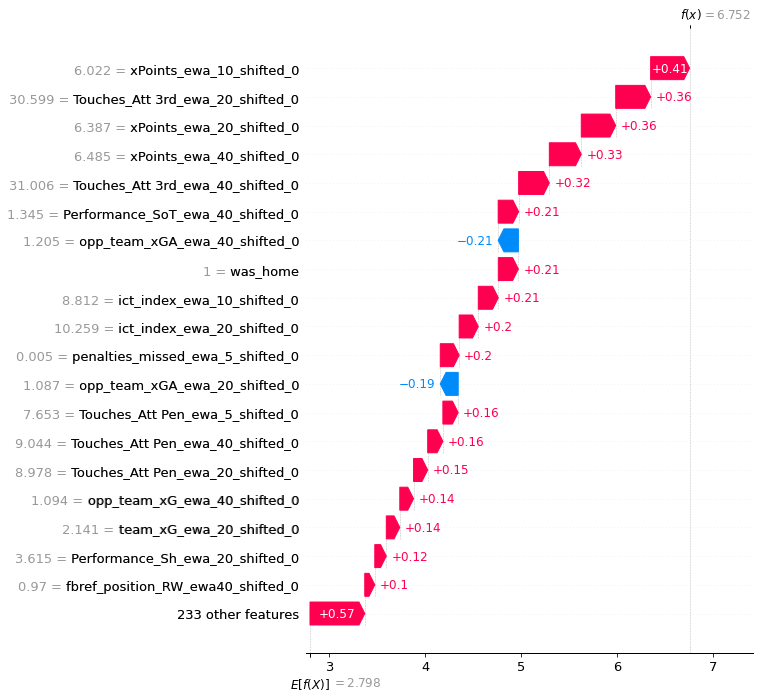

In [26]:
shap.plots.waterfall(shap_values[ixs[0]], max_display=20)